# Это Министерству культуры

In [187]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from collections import Counter

%matplotlib inline

## Мать Катюхина и ежи с ней театроанализируют

In [47]:
with open("data-2018-structure-1.json", "r", encoding='utf-8') as file:
    p = json.load(file)

In [97]:
p[7]['data']

{'sublect_id': 10,
 'subject_name': 'Респ. Адыгея',
 'kopuk': '040563',
 'theatre_name': 'Национальный театр Республики Адыгея',
 'theatre_genre': 'Драматические театры',
 'composition_id': 1104048,
 'composition_name': 'Кабала святош',
 'authors': 'Булгаков М.',
 'composition_genre': 'Драма',
 'historically_national_attribute': 'Произведения советских авторов',
 'nationally_territorial_attribute': 'Россия',
 'spectator_age': 'Для взрослых',
 'subordination': 'Местное',
 'composition_premiere': '1711',
 'number_of_performances,_total': 10,
 'number_of_performances,_stationary': 2,
 'number_of_spetators,_total': 1.41,
 'number_of_spetators,_stationary': 0.11}

### Распределение зрителей по возрастным категориям

In [135]:
ana_age = []
for items in p:
    item = items['data']
    ana_age.append(item['spectator_age'])

In [136]:
all_ages = dict(Counter(ana_age))

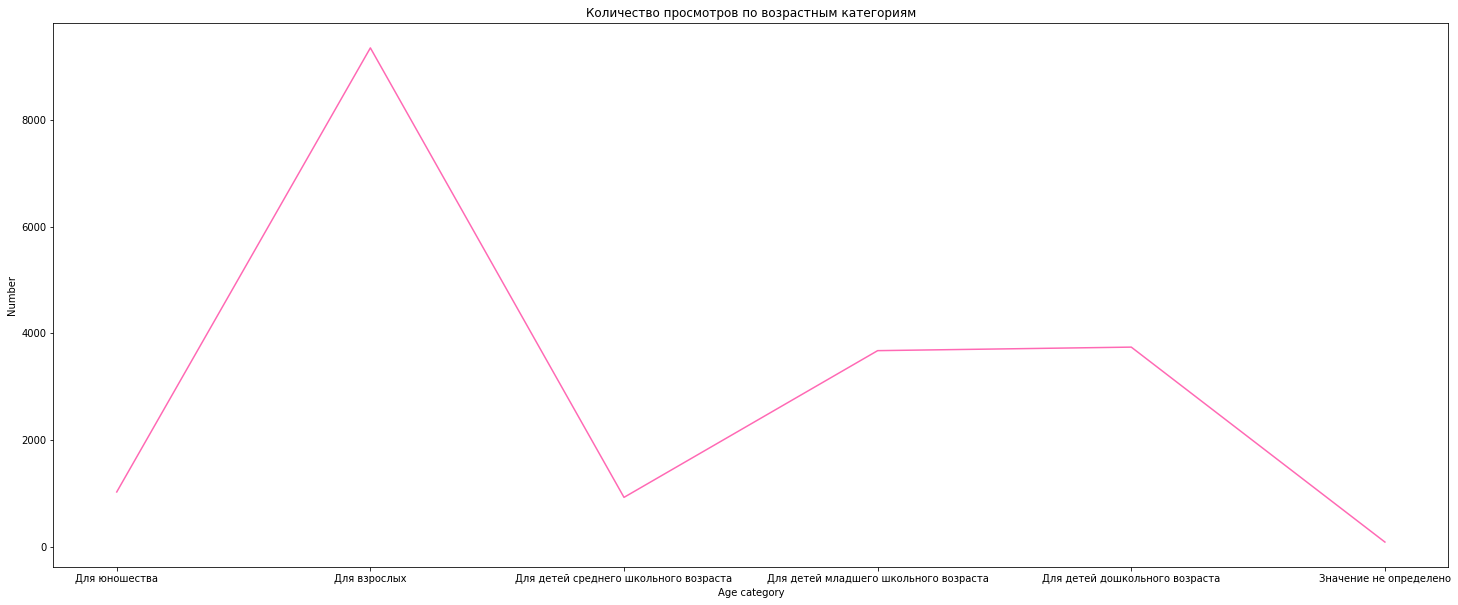

In [158]:
X = all_ages.keys()
Y = all_ages.values()

fig, ax = plt.subplots()

plt.plot(X, Y, color='hotpink') # рисуем график - последовательно соединяем точки с координатами из X и Y
plt.title('Количество просмотров по возрастным категориям') # заголовок
plt.ylabel('Number') # подпись оси Х
plt.xlabel('Age category') # подпись оси Y
fig.set_figwidth(25)
fig.set_figheight(10)
plt.show()

### Соотношение просмотров и количества постановок

In [138]:
ana_gen = []
for items in p:
    item = items['data']
    ana_gen.append(item['composition_genre'])

In [139]:
most_common_genres_all = Counter(ana_gen).most_common(15)

In [140]:
all_stats = []
for item in most_common_genres_all:
    genre = item[0]
    number_performances = 0
    spectators = 0
    for item in p:
        performance = item['data']
        if performance['composition_genre'] == genre:
            number_performances = number_performances + performance['number_of_performances,_total']
            spectators = spectators + performance['number_of_spetators,_total']
    genre_stats = (genre, number_performances, round(spectators, 2))
    all_stats.append(genre_stats)

In [146]:
genres = []
performances = []
spectators = []

for stat in all_stats:
    genres.append(stat[0])
    performances.append(stat[1])
    spectators.append(stat[2])

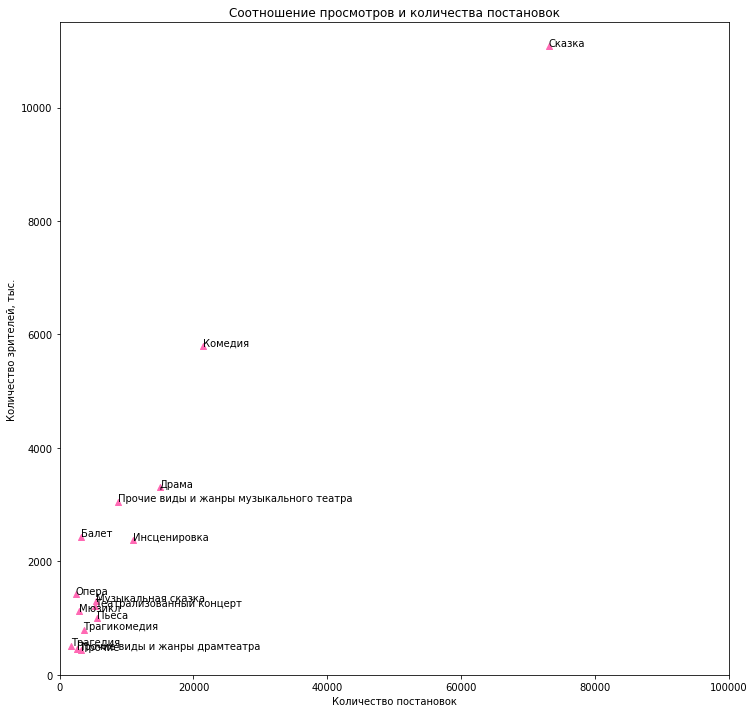

In [159]:
X = performances
Y = spectators
labels = genres

plt.figure(figsize=(12, 12)) # размер графика
plt.scatter(X, Y, color='hotpink', label='group 1', marker='^') # маркер - треугольник
for x, y, key in zip(X, Y, range(len(X))):
    plt.text(x+0.2, y, labels[key]) # подписи
plt.title('Соотношение просмотров и количества постановок')
plt.ylabel('Количество зрителей, тыс.')
plt.xlabel('Количество постановок')
plt.xlim((0, 100000)) # предел по х
plt.ylim((0, 11500)) # предел по у
plt.show()

### Топ-10 просматриваемых жанров

In [148]:
list_gen = []
for i in p: #часто просматриваемые - 'number_of_spetators,_total'
    name = i['data']['composition_genre']
    list_gen.append(name)
freq = Counter(list_gen)

In [149]:
most_spec = Counter(freq).most_common(10)
list_numb  = []
list_name = []
for tup in most_spec:
    list_numb.append(tup[1])
    list_name.append(tup[0])
most_spec

[('Сказка', 6250),
 ('Комедия', 2833),
 ('Драма', 2073),
 ('Инсценировка', 1266),
 ('Пьеса', 679),
 ('Опера', 585),
 ('Балет', 574),
 ('Музыкальная сказка', 562),
 ('Трагикомедия', 495),
 ('Мюзикл', 355)]

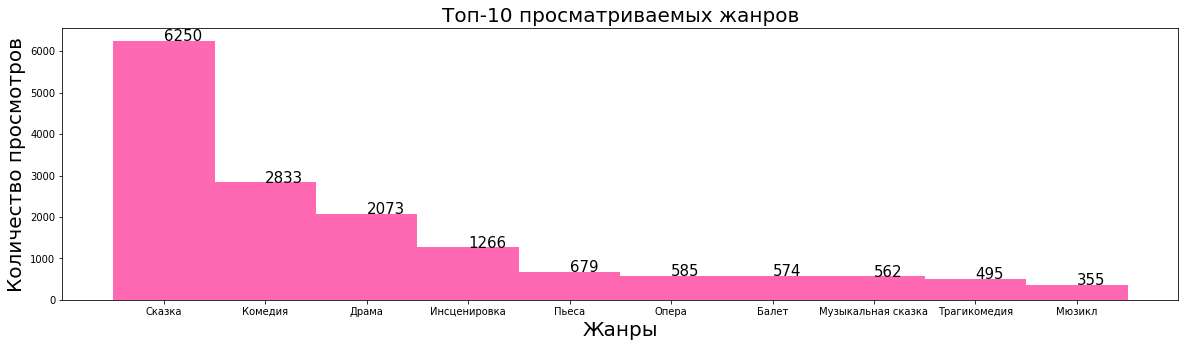

In [152]:
X = list_name
Y = list_numb
fig, ax = plt.subplots() 

plt.title('Топ-10 просматриваемых жанров', fontsize = 20)
plt.ylabel('Количество просмотров', fontsize = 20)
plt.xlabel('Жанры', fontsize = 20)
plt.bar(X, Y, width=1, color='hotpink')
#  Добавляем текст:
for i, y in enumerate(Y):
    ax.text(i, y+1, str(y),
            rotation = 0,
            fontsize = 15)
ax.tick_params(labelsize = 10)
fig.set_figwidth(20)
fig.set_figheight(5)
plt.show()

## Ну и как там со спектаклями для взрослых?

### 18+: жанры

In [51]:
genres = []
for item in p:
    performance = item['data']
    if performance['spectator_age'] == 'Для взрослых':
        genres.append(performance['composition_genre'])

In [65]:
most_common_genres = Counter(genres).most_common(5)
most_common_genres = dict(most_common_genres)

{'Комедия': 2493,
 'Драма': 1648,
 'Инсценировка': 782,
 'Опера': 525,
 'Балет': 473}

In [68]:
most_common_genres_data = {
    "Genre": most_common_genres.keys(),
    "Number": most_common_genres.values()
}

df = pd.DataFrame(most_common_genres_data)
df

,Genre,Number
0,Комедия,2493
1,Драма,1648
2,Инсценировка,782
3,Опера,525
4,Балет,473


### 18+: распределение по регионам

In [160]:
number_in_towns = []
for i in p:
    number_in_towns.append(i['data']['subject_name'])

In [161]:
all_performances = dict(Counter(number_in_towns))

In [162]:
town = []
for i in p:
    if i['data']['spectator_age'] == 'Для взрослых':
        town.append(i['data']['subject_name'])

In [163]:
adult_performances = dict(Counter(town))

In [164]:
adult = []
for i, j in adult_performances.items():
    adult.append(j)

In [165]:
all_ = []
for i, j in all_performances.items():
    all_.append(j)

In [166]:
values = []
i = 0
while i < 82:
    value = round(adult[i]/all_[i]*100)
    values.append(value)
    i += 1

In [167]:
adult_town = {}
i = 0
while i < 82:
    adult_town.update({list(adult_performances.keys())[i]:values[i]})
    i += 1

In [168]:
sorted_values = sorted(adult_town.values()) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in adult_town.keys():
        if adult_town[k] == i:
            sorted_dict[k] = adult_town[k]
            break

In [169]:
data_percentage = {
    'Subject': sorted_dict.keys(),
    'Percentage of 18+ performances': sorted_dict.values()
}

df = pd.DataFrame(data_percentage)

In [170]:
least_common = df.head(7)
least_common

,Subject,Percentage of 18+ performances
0,Еврейская авт.обл.,19
1,Ханты-Мансийский а.о-Югра,23
2,Амурская обл.,24
3,Псковская обл.,25
4,Респ. Мордовия,31
5,Кировская обл.,32
6,Карачаево-Черкесская Респ.,33


In [171]:
most_common = df.tail(7)
most_common

,Subject,Percentage of 18+ performances
26,Кабардино-Балкарская Респ.,53
27,Респ. Бурятия,54
28,Респ. Татарстан,56
29,Респ. Дагестан,58
30,Респ. Тыва,59
31,Респ. Башкортостан,60
32,Ленинградская обл.,64


## Всем нужны деньги, куда же деть деньги?

In [172]:
aged = []
for items in p:
    item = items['data']
    if item['spectator_age'] == 'Для взрослых':
        aged.append(item)

In [173]:
name_and_perf = {}
for item in aged:
    if item['composition_name'] not in name_and_perf.keys():
        name_and_perf.update({item['composition_name']: item['number_of_performances,_total']})
    else:
        name_and_perf[item['composition_name']] = name_and_perf[item['composition_name']]+item['number_of_performances,_total']

In [174]:
adults_top_10_perf = dict(Counter(name_and_perf).most_common()[0:10:])

named = {}
unnamed = {}

for key,value in adults_top_10_perf.items():
    if key == 'Концерт':
        unnamed.update({key: value})
    elif key == 'Театрализованное представление':
        unnamed.update({key: value})
    elif key == 'Встреча со зрителем':
        unnamed.update({key: value})
    elif key == 'Бенефис (Творческий вечер актера)':
        unnamed.update({key: value})
    else:
        named.update({key: value})

In [175]:
adults_top_10_perf_data = {
    'Genre': list(adults_top_10_perf.keys()),
    'Number': list(adults_top_10_perf.values())
}

df = pd.DataFrame(adults_top_10_perf_data)
df

,Genre,Number
0,Концерт,7922
1,Театрализованное представление,4669
2,Встреча со зрителем,639
3,Ханума,528
4,Бенефис (Творческий вечер актера),524
5,Женитьба,484
6,Щелкунчик,461
7,Рассказы,395
8,Ромео и Джульетта,360
9,Тетки,356


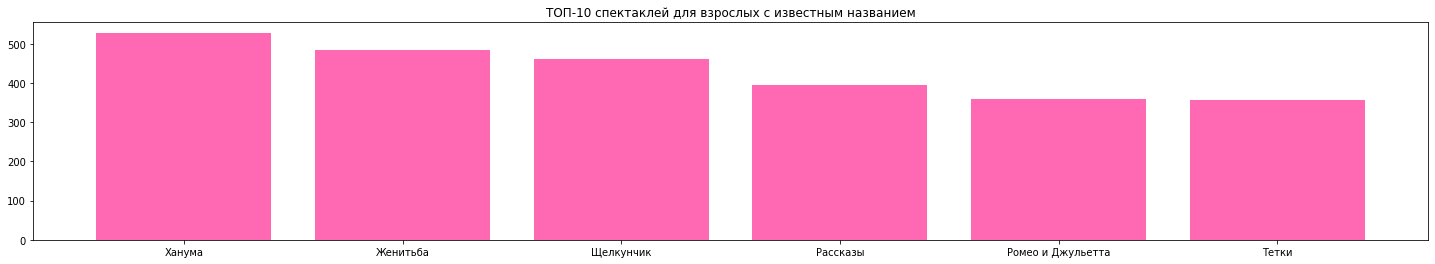

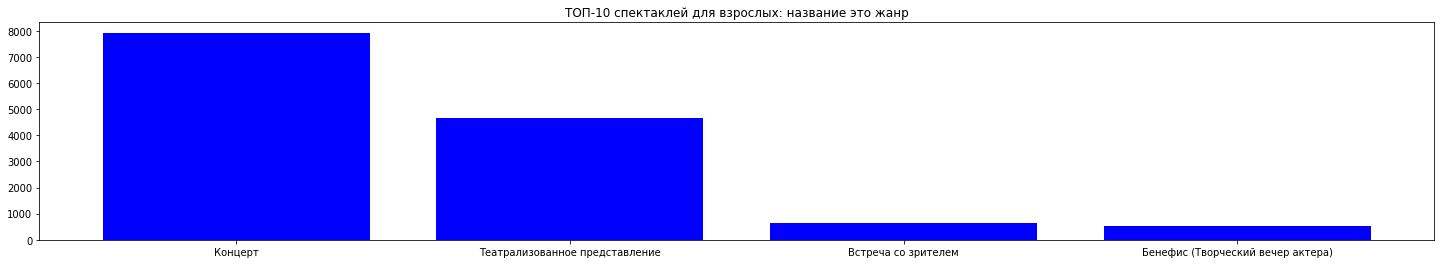

In [176]:
X1 = named.keys()
Y1 = named.values()

X2 = unnamed.keys()
Y2 = unnamed.values()

fig, ax = plt.subplots()

plt.bar(X1, Y1, color='hotpink')
plt.title('ТОП-10 спектаклей для взрослых с известным названием')
fig.set_figwidth(25)
plt.show()

fig, ax = plt.subplots()

plt.bar(X2, Y2, color='blue')
plt.title('ТОП-10 спектаклей для взрослых: название это жанр')
fig.set_figwidth(25)
plt.show()

In [177]:
freq = dict()
for i in p:
    if i['data']['spectator_age']:
        spec = (i['data']['number_of_spetators,_total'])
        name = (i['data']['composition_name'])
        freq[name] = spec

most_spec = dict(Counter(freq).most_common(6))

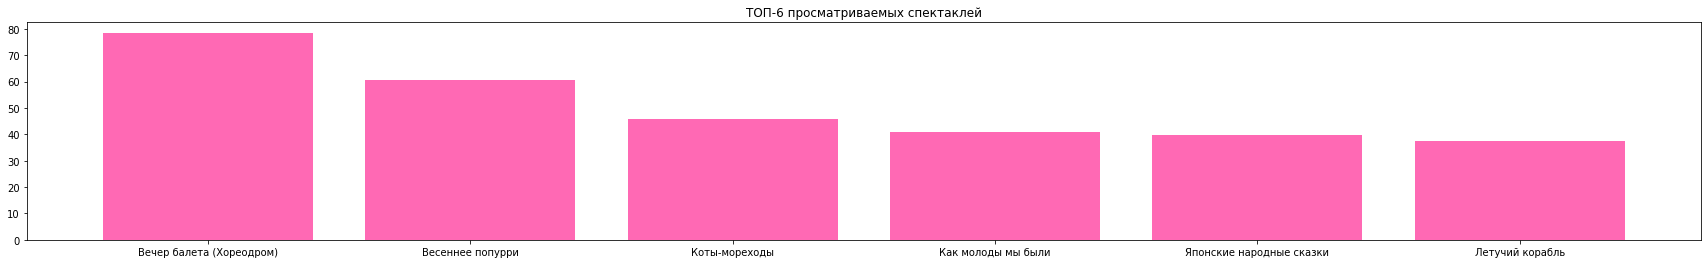

In [178]:
X1 = most_spec.keys()
Y1 = most_spec.values()

fig, ax = plt.subplots()

plt.bar(X1, Y1, color='hotpink')
plt.title('ТОП-6 просматриваемых спектаклей')
fig.set_figwidth(30)
plt.show()

In [179]:
perf_places_types = []

for name in adults_top_10_perf.keys():
    for items in p:
        item = items['data']
        if item['composition_name'] == name:
            perf_places_types.append([item['theatre_genre'], item['subject_name']])
            
            
spec_places_types = []

for name in most_spec.keys():
    for items in p:
        item = items['data']
        if item['composition_name'] == name:
            spec_places_types.append([item['theatre_genre'], item['subject_name']])

In [180]:
place_genre_perf = pd.DataFrame(perf_places_types, columns=['type', 'city'])
place_genre_perf['n'] = 1
for_heatmap_perf = place_genre_perf.groupby(
    ['type', 'city'], as_index=False).agg({'n':sum}).pivot_table(index="type", columns="city", values="n").fillna(0)

In [181]:
colnames_top_10 = for_heatmap_perf.sum(axis=0).sort_values().tail(10).index.tolist()

In [182]:
for_heatmap_perf_top = for_heatmap_perf[colnames_top_10]

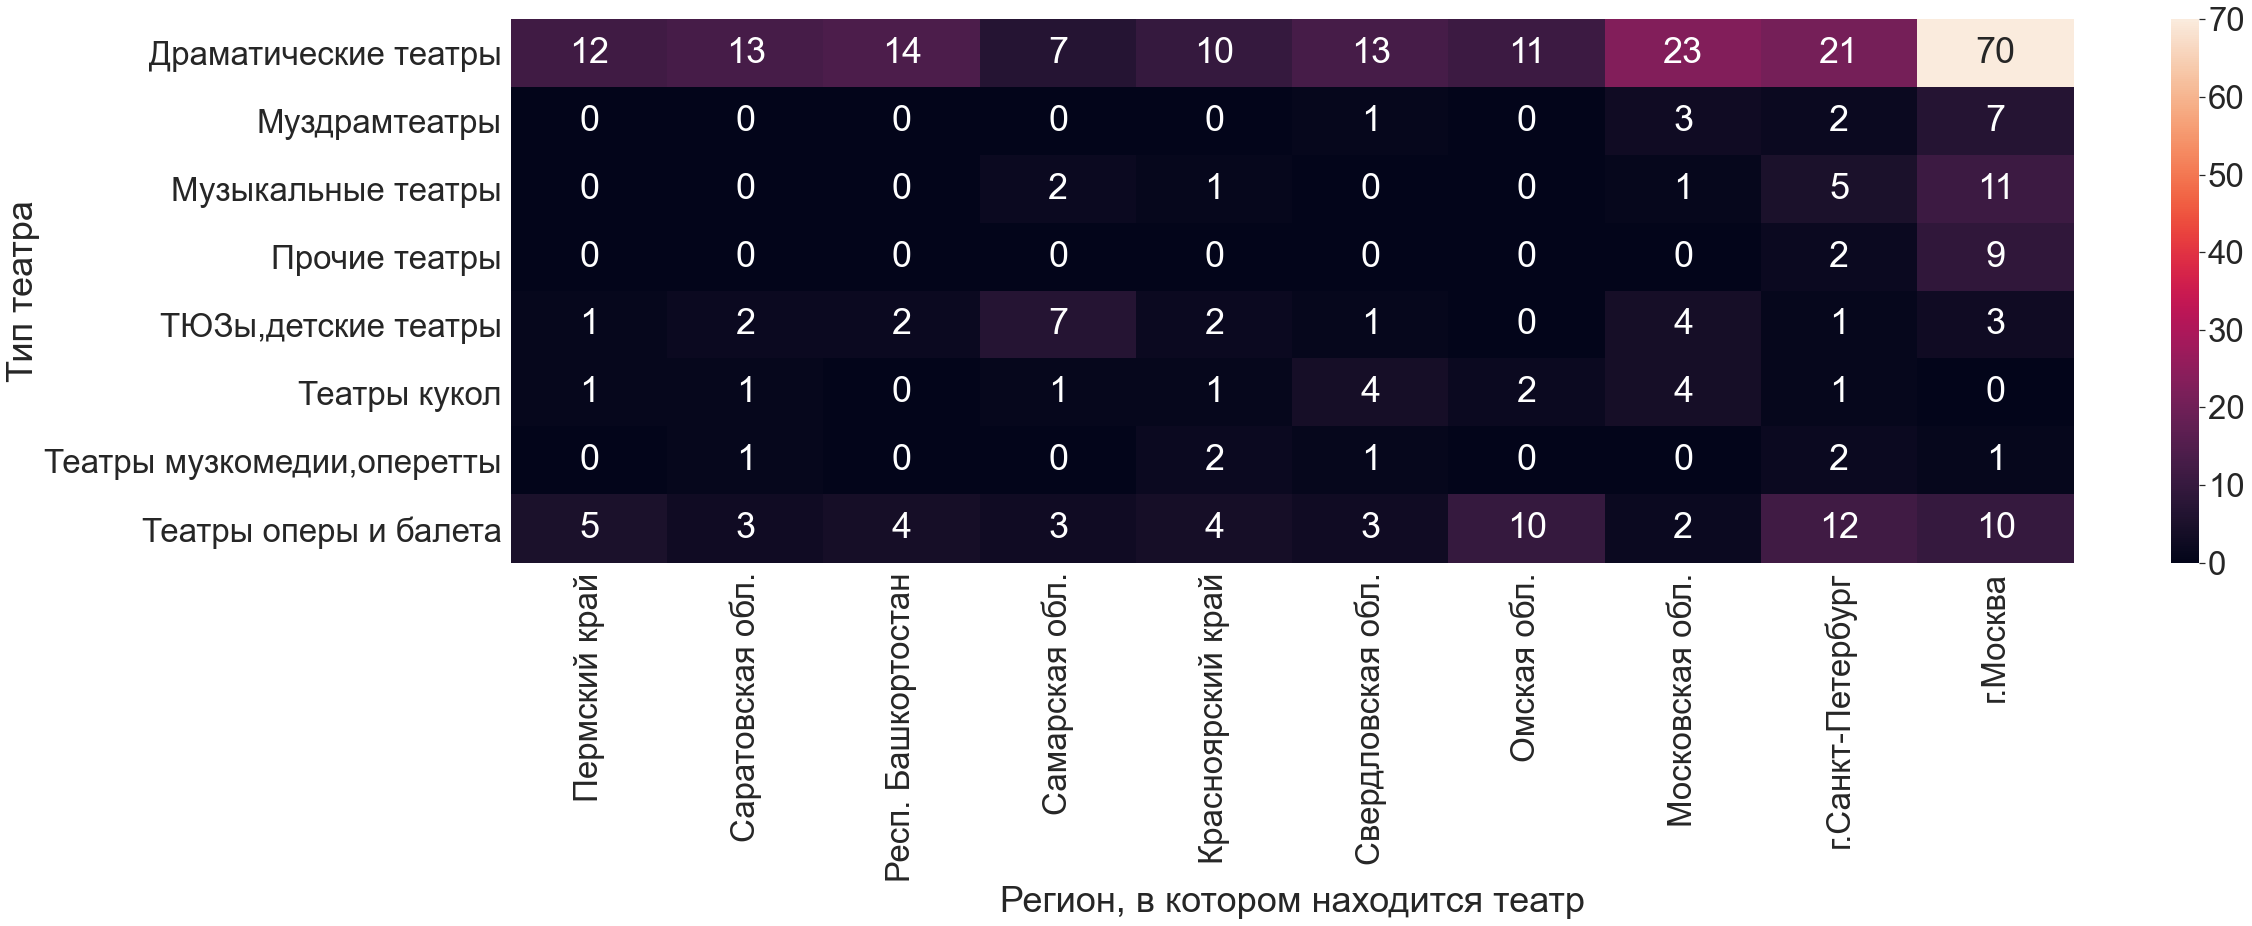

In [188]:
sns.set(font_scale=3)
fig, ax = plt.subplots(figsize=(35,10))
sns.heatmap(
    for_heatmap_perf_top,
    annot=True,
    ax=ax)

plt.xlabel('Регион, в котором находится театр')
plt.ylabel('Тип театра')
plt.show()

In [189]:
place_genre_spec = pd.DataFrame(spec_places_types, columns=['type', 'city'])
place_genre_spec['n'] = 1
for_heatmap_spec = place_genre_spec.groupby(
    ['type', 'city'], as_index=False).agg({'n':sum}).pivot_table(index="type", columns="city", values="n").fillna(0)

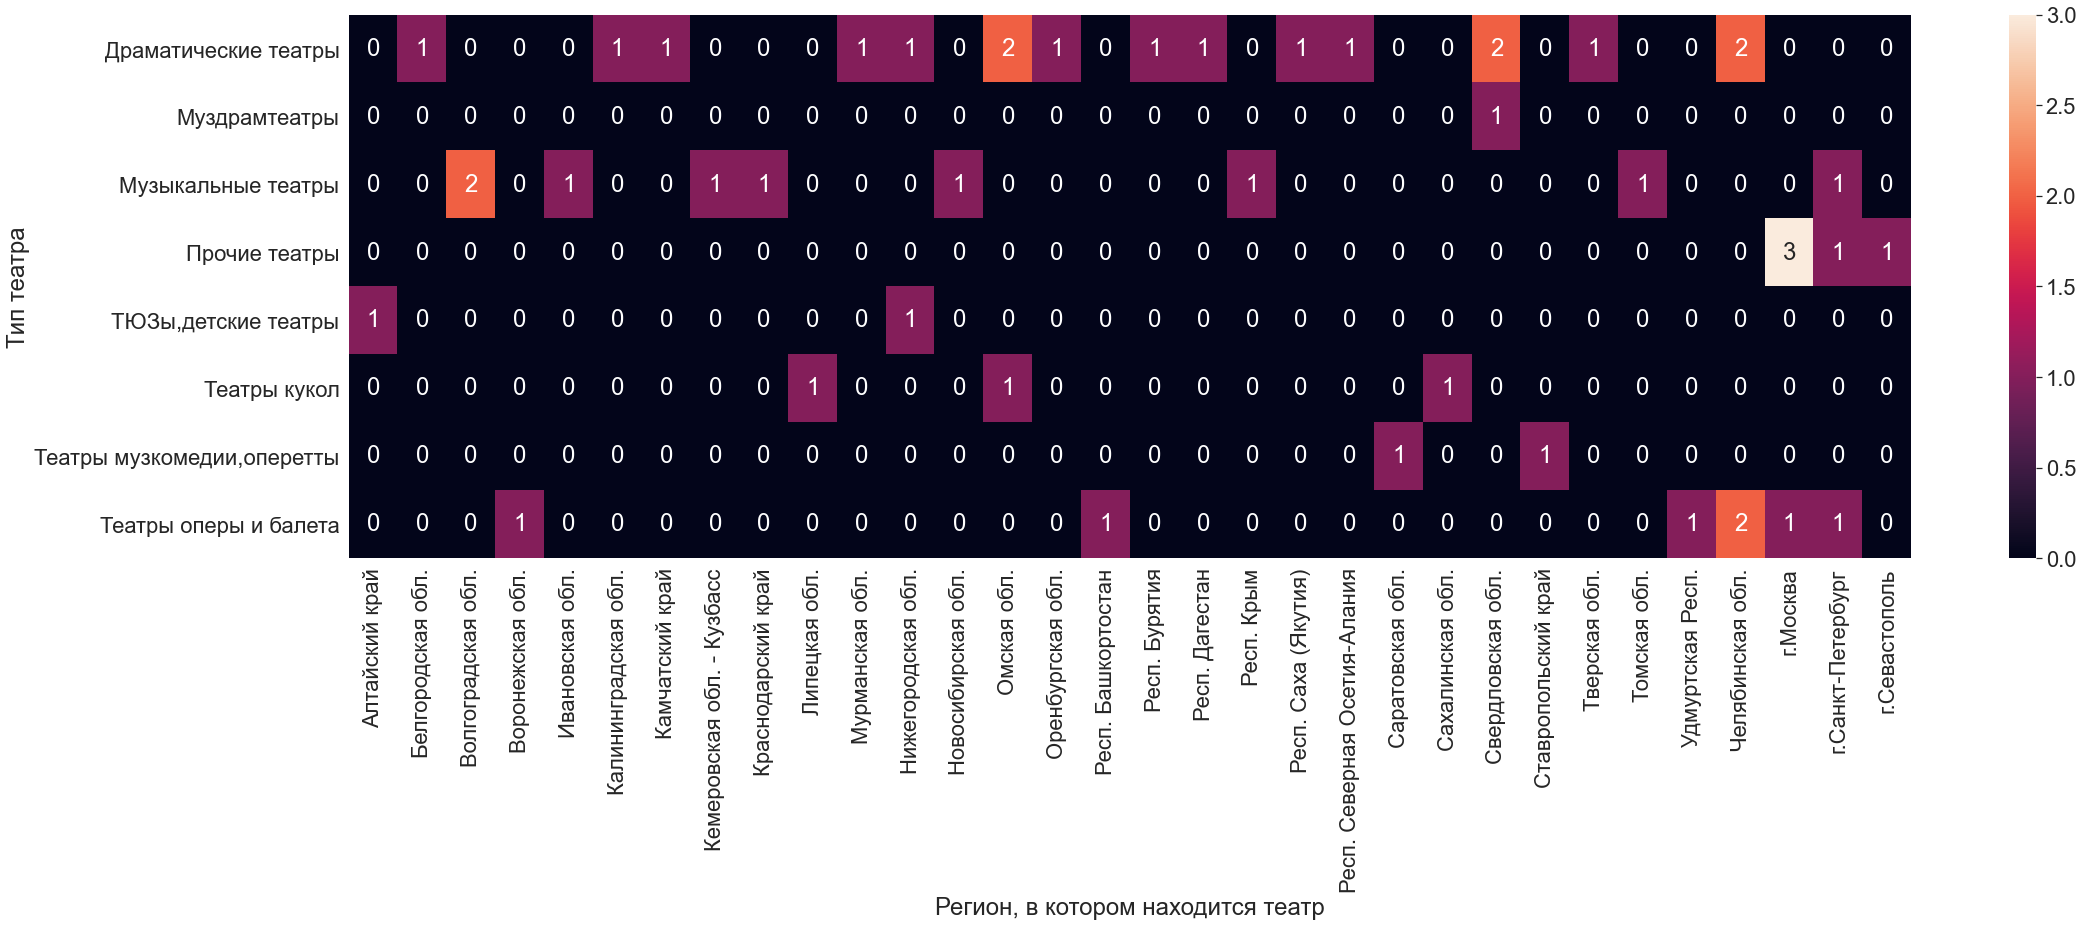

In [190]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(35,10))
sns.heatmap(
    for_heatmap_spec,
    annot=True,
    ax=ax)

plt.xlabel('Регион, в котором находится театр')
plt.ylabel('Тип театра')
plt.show()

#### Cамые популярные по постановкам и по просмотрам регионы совпадают: Москва, МО, СПб

#### Самые популярные по постановкам и по просмотрам типы театров не совпадают: больше всего постановок в театрах оперы и балета

#### Больше всего просмотров - у прочих театров. Что это за театры?

In [191]:
unusual_theatres = []
for items in p:
    if items['data']['theatre_genre'] == 'Прочие театры' and items['data']['subject_name'] == 'г.Москва':
        unusual_theatres.append(items['data']['theatre_name'])

interest = dict(Counter(unusual_theatres)).keys()
list(interest)

['Московский театр спортивно-зрелищных представлений "Каскадер"',
 'Театриум на Серпуховке п/р Т.Дуровой',
 'Московский театр иллюзии',
 'Московский гос.театр Эстрады',
 'Московский культурный фольклорный центр Людмилы Рюминой',
 'Международный ТКЦ Славы Полунина',
 'Театр "Уголок дедушки Дурова"',
 'Театр кошек Куклачева']

#### Среди зрителей популярны театры "на стыке с цирками", которых мало в регионах

## Министерство культуры сильнее льва и тигра, но театры-цирки не финансирует...